In [1]:
import numpy as np                                                               
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def importaArquivo(nomeArquivo):
    numRegras = 0
    tempoF = 0
    tempoI = 0
    lidas = 0
    resultado = []
    try:
        with open(nomeArquivo) as arquivo:
            for linha in arquivo:
                vetor = linha.split()
                if len(vetor) == 3:
                    numRegras = float(vetor[1])
                    lidas += 1
                elif len(vetor) == 6:
                    if vetor[1] == 'Request':
                        tempoI = float(vetor[4])
                        lidas += 1
                    if vetor[1] == 'Reply':
                        tempoF = float(vetor[4])
                        lidas += 1
                if lidas == 3:
                    info = []
                    info.append(numRegras)
                    info.append(tempoF-tempoI)
                    resultado.append(info)
                    lidas = 0
        return resultado
    except(IOError):
        print "Erro ao abrir o arquivo:"+nomeArquivo

In [3]:
teste = importaArquivo('saida2.txt')

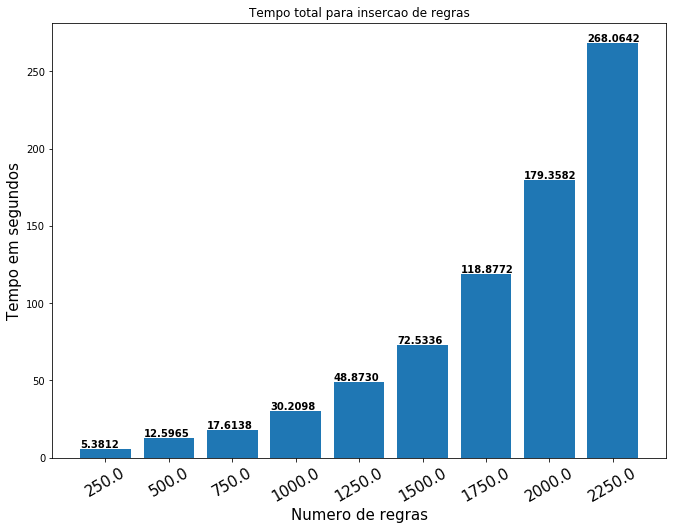

In [4]:
labels, ys = zip(*teste)
index = np.arange(len(labels))
plt.bar(index, ys)
plt.xlabel('Numero de regras', fontsize=15)
plt.ylabel('Tempo em segundos', fontsize=15)
plt.xticks(index, labels, fontsize=15, rotation=30)
plt.title('Tempo total para insercao de regras')
fig = plt.gcf()
fig.set_size_inches(11,8)
for i, v in enumerate(ys):
    plt.text(i-0.4, v+1, str("%.4f" %v), color='black', fontweight='bold')
plt.savefig('test.png')
plt.show()